# Adaptive-Runge–Kutta

test  python against C++


In [1]:
import os

#go to python to load the RK solver
os.chdir('../../../python/Adaptive-Runge–Kutta/')

In [2]:
from Solver.AdaptiveRungeKutta import RKF

In [3]:
class DormandPrince:
    def __init__(self):
        self.s=7
        self.p=4
        self.c=[0,1/5.,3/10.,4/5.,8/9.,1.,1.]
        self.b=[5179/57600.,0,7571/16695.,393/640.,-92097/339200.,187/2100.,1/40.]
        self.bstar=[ 35/384.,0.,500/1113.,125/192.,-2187/6784.,11/84.,0 ]
        self.a=[ [0 for j in range(self.s)] for i in range(self.s)]
        
        self.a[6][0]=35/384.
        self.a[6][1]=0
        self.a[6][2]=500/1113.
        self.a[6][3]=125/192.
        self.a[6][4]=-2187/6784.
        self.a[6][5]=11/84.
        
        self.a[1][0]=1/5.
        
        self.a[2][0]=3/40.
        self.a[2][1]=9/40.
        
        self.a[3][0]=44/45.
        self.a[3][1]=-56/15.
        self.a[3][2]=32/9.
        
        self.a[4][0]=19372/6561.
        self.a[4][1]=-25360/2187.
        self.a[4][2]=64448/6561.
        self.a[4][3]=-212/729.        
        

        self.a[5][0]=9017/3168.
        self.a[5][1]=-355/33.
        self.a[5][2]=46732/5247.
        self.a[5][3]=49/176.
        self.a[5][4]=-5103/18656.
        

        
dp=DormandPrince()

In [4]:
class diff_eq:
    def __init__(self,n=1):
        self.n_eqs=n
        
                   
    def __call__(self,y,t):
        return [-20*y[0]*t**3,
                5*y[0]*t**2+2*(-y[1]**2+y[2]**2)*t,  
                15*y[0]*t**2+2*(y[1]**2-y[2]**2)*t ]

    
dydt=diff_eq(3)

in0=[5,10,0]
sol=RKF(diffeq=dydt,init_cond=in0,RK_method=dp,
                      initial_step_size=1e-4,minimum_step_size=1e-11,maximum_step_size=1e-2,
                      maximum_No_steps=100000,absolute_tolerance=1e-6,relative_tolerance=1e-6,
                      beta=0.85,fac_max=3)

In [5]:
sol.solve()

In [6]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [7]:
os.chdir('../../C++/Adaptive_RK/')

In [8]:
%%sh
g++ RKF.cpp -I ./

./a.out;

I'm done


In [9]:
#load the results from C++
os.chdir('./test/')

tpp= np.loadtxt('t.dat')
y1pp=np.loadtxt('y1.dat')
y2pp=np.loadtxt('y2.dat')
y3pp=np.loadtxt('y3.dat')

err=np.loadtxt('err.dat')

<IPython.core.display.Javascript object>


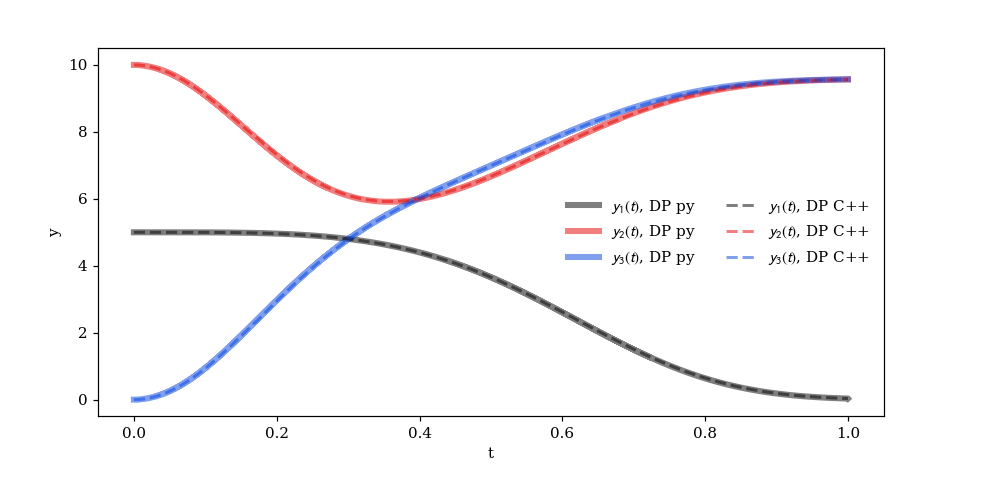

In [10]:
fig=plt.figure(figsize=(9,4.5))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(111)
for i in range(len(sol.solution)):
    sub.plot(sol.t,sol.y[i],c=_c[i],alpha=0.5,linestyle='-',linewidth=4,label=r'$y_{'+str(i+1)+'}(t)$, DP py')

sub.plot(tpp,y1pp,c=_c[0],alpha=0.5,linestyle='--',linewidth=2,label=r'$y_{1}(t)$, DP C++')
sub.plot(tpp,y2pp,c=_c[1],alpha=0.5,linestyle='--',linewidth=2,label=r'$y_{2}(t)$, DP C++')
sub.plot(tpp,y3pp,c=_c[2],alpha=0.5,linestyle='--',linewidth=2,label=r'$y_{3}(t)$, DP C++')

    

sub.set_ylabel('y')     
sub.set_xlabel('t')  
sub.legend(framealpha=0,ncol=2,loc='center right',bbox_to_anchor=(1,0.5))

plt.show()

<IPython.core.display.Javascript object>


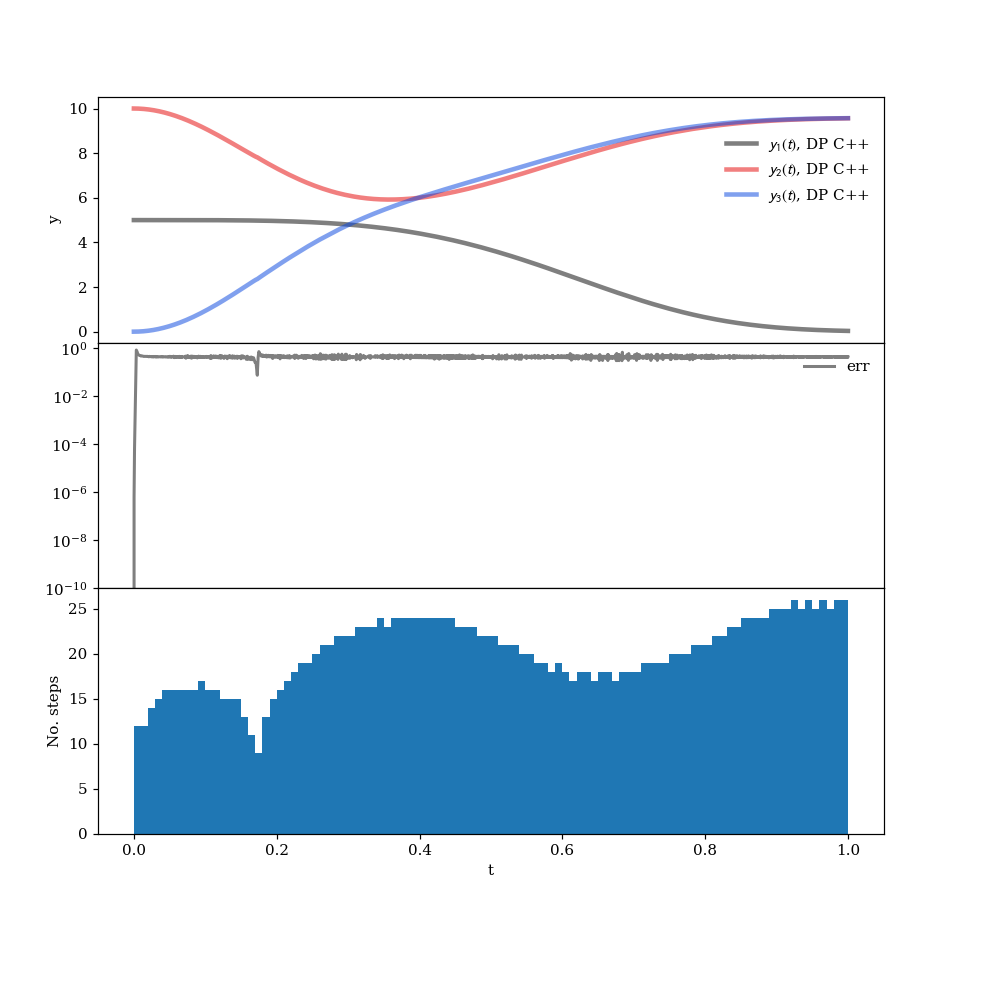

In [11]:
fig=plt.figure(figsize=(9,9))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(311)

sub.plot(tpp,y1pp,c=_c[0],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{1}(t)$, DP C++')
sub.plot(tpp,y2pp,c=_c[1],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{2}(t)$, DP C++')
sub.plot(tpp,y3pp,c=_c[2],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{3}(t)$, DP C++')
sub.legend(framealpha=0,ncol=1,loc='upper right',bbox_to_anchor=(1,.9))

sub.set_ylabel('y')   
    

sub = fig.add_subplot(312)    
sub.plot(tpp,err,c=_c[0],alpha=0.5,linestyle='-',linewidth=2,label="err")
sub.legend(framealpha=0,ncol=1,loc='center right',bbox_to_anchor=(1,.9))

        
if max(err) != 0 : 
    sub.set_ylim(max([min(err),1e-10]),max(err)*2 )
    sub.set_yscale('log')
else:
    sub.set_ylim(min(err),max(err))



sub = fig.add_subplot(313)    
sub.hist(tpp,bins=100)
sub.set_ylabel('No. steps')
    
   
sub.set_xlabel('t')  
plt.show()

<IPython.core.display.Javascript object>


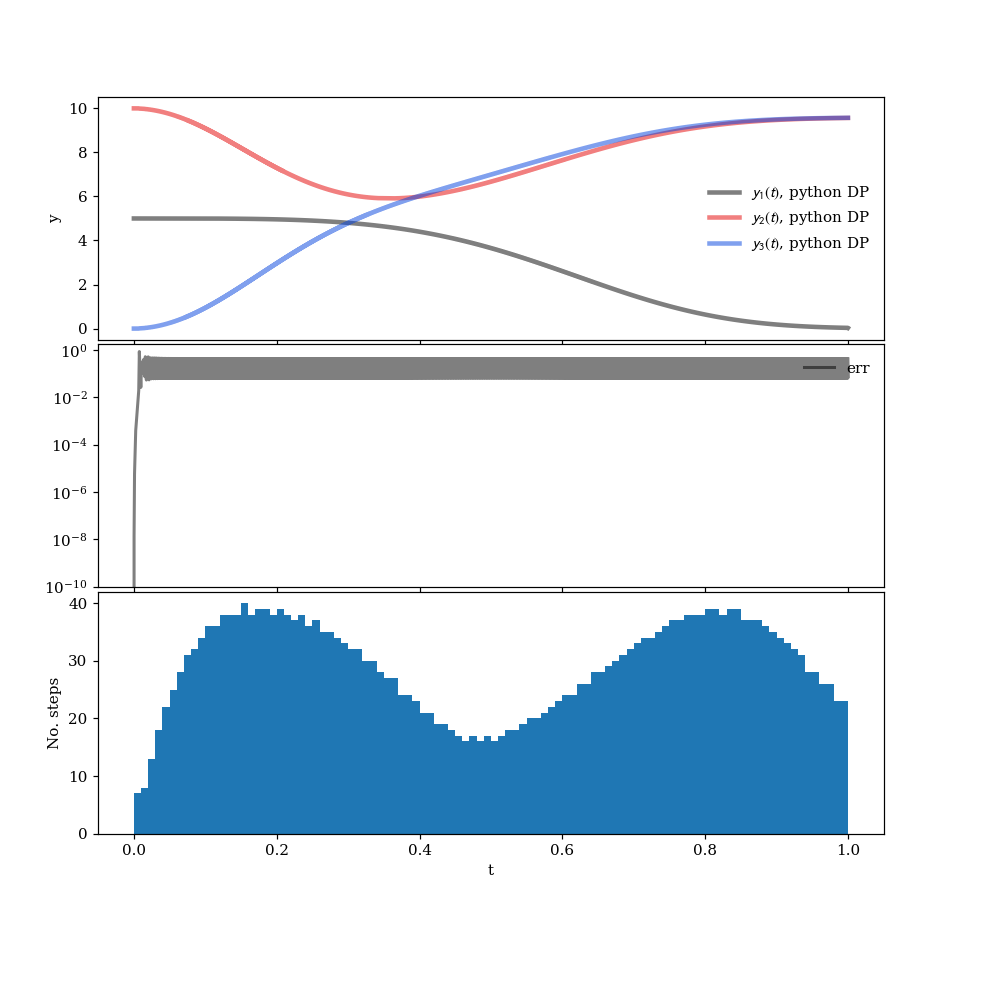

In [12]:
fig=plt.figure(figsize=(9,9))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.02)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(311)
for i in range(len(sol.y)):
    sub.plot(sol.t,sol.y[i],c=_c[i],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{'+str(i+1)+'}(t)$, python DP') 
    #sub.scatter(sol.t,sol.y[i],c=_c[i],marker='.',alpha=0.5,s=0.05) 
    sub.set_ylabel('y')  

sub.legend(framealpha=0,ncol=1,loc='center right',bbox_to_anchor=(1,0.5))




sub = fig.add_subplot(312)    
sub.plot(sol.t,sol.deltas,c=_c[0],alpha=0.5,linestyle='-',linewidth=2,label="err")
sub.legend(framealpha=0,ncol=1,loc='center right',bbox_to_anchor=(1,.9))


if max(sol.deltas) != 0 : 
    sub.set_ylim(max([min(sol.deltas),1e-10]),max(sol.deltas)*2 )
    sub.set_yscale('log')
else:
    sub.set_ylim(min(sol.deltas),max(sol.deltas))



sub = fig.add_subplot(313)    
sub.hist(sol.t,bins=100)
sub.set_ylabel('No. steps')
    
sub.set_xlabel('t')  


plt.show()